## Butterfly Effect
### "Does the flap of a butterfly’s wings in Brazil set off a tornado in Texas?"
#### ~Edward Lorenz

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
sigma = 10.0
rho = 28.0
beta = 8/3.0

In [3]:
# initial conditions
initial_conditions_1 = [0.0,1.2,1.05]
# slightly perturb the coordinates
initial_conditions_2 = [0.0,1.2+1e-5,1.05]

t_span = (0,80)
t_eval = np.linspace(t_span[0],t_span[1],10000)

In [4]:
print(f"Trajectory 1 with initial conditions: {initial_conditions_1}")
print(f"Trajectory 2 with initial conditions: {initial_conditions_2}")

Trajectory 1 with initial conditions: [0.0, 1.2, 1.05]
Trajectory 2 with initial conditions: [0.0, 1.20001, 1.05]


In [5]:
"""
Lorenz system differential equations.
t (float): required by solve_ivp
coords: contains the current [x,y,z] coordinates (can be list or array)
sigma (float): The Prandtl number.
rho (float): The Rayleigh number.
beta (float): The geometric factor.
"""

def diff_lorenz(t,coords,sigma,rho,beta):
	x,y,z = coords
	dxdt = sigma*(y-x)
	dydt = x*(rho-z)-y
	dzdt = x*y-beta*z
	return [dxdt,dydt,dzdt]

In [6]:
# solving the equations using Explicit Runge-Kutta of order 5(4)
sol1 = integrate.solve_ivp(
	diff_lorenz,
	t_span,
	initial_conditions_1,
	method="RK45",
	args=(sigma,rho,beta),
	t_eval=t_eval)

sol2 = integrate.solve_ivp(
	diff_lorenz,
	t_span,
	initial_conditions_2,
	method="RK45",
	args=(sigma,rho,beta),
	t_eval=t_eval)

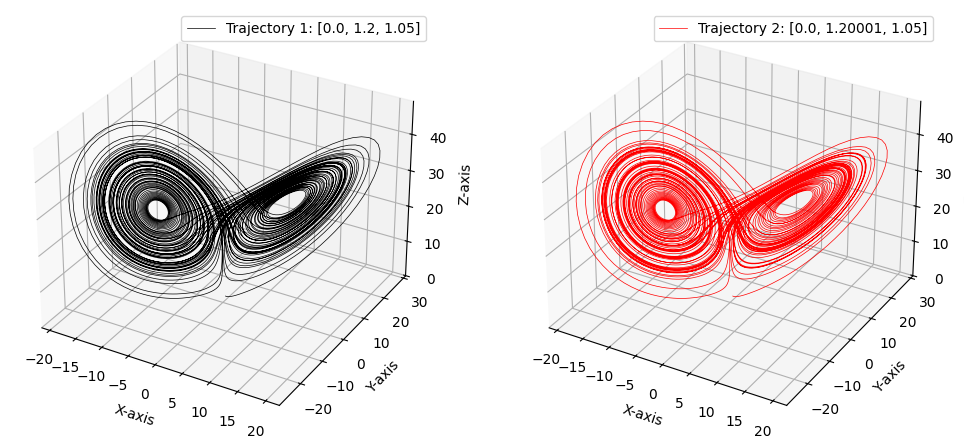

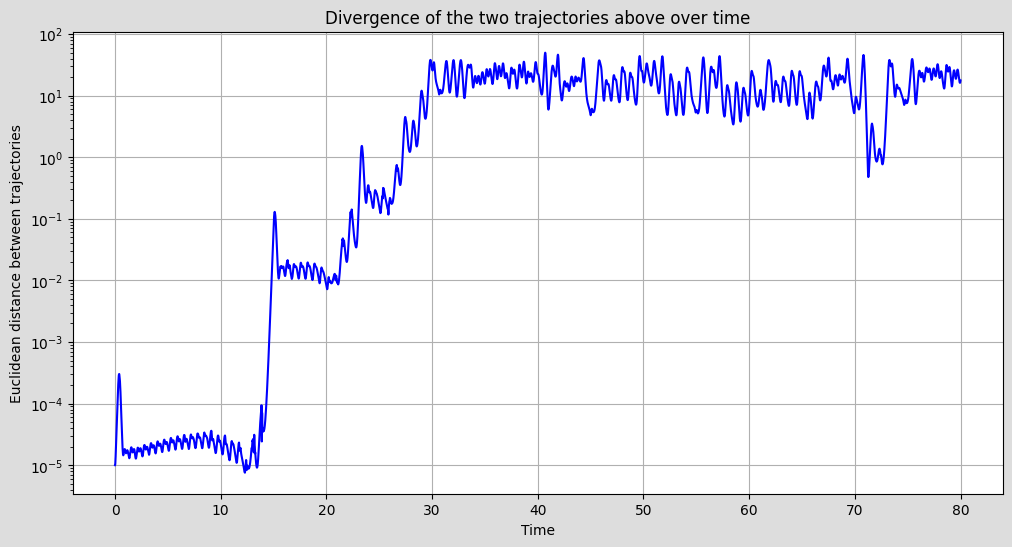

In [7]:
if sol1.success and sol2.success:
	x1,y1,z1 = sol1.y
	x2,y2,z2 = sol2.y

	# plotting the two trajectories
	fig = plt.figure(figsize=(12,10))
    
	# 1st trajectory
	ax = fig.add_subplot(121,projection="3d")
	ax.plot(x1,y1,z1,lw=0.5,color="black",label='Trajectory 1: {}'.format(initial_conditions_1),alpha=1)
	ax.set_xlabel("X-axis")
	ax.set_ylabel("Y-axis")
	ax.set_zlabel("Z-axis")
	ax.legend()
	ax.grid(True)

	# 2nd trajectory
	ax = fig.add_subplot(122,projection="3d")
	ax.plot(x2,y2,z2,lw=0.5,color="red",label='Trajectory 2: {}'.format(initial_conditions_2),alpha=1)
	ax.set_xlabel("X-axis")
	ax.set_ylabel("Y-axis")
	ax.set_zlabel("Z-axis")
	ax.legend()
	ax.grid(True)
	plt.show()

	# euclidean distance between the two trajectories over time
	euclid_dist = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)

	plt.figure(facecolor="#dddddd",figsize=(12,6))
	plt.plot(t_eval,euclid_dist,color="blue",alpha=1)
	plt.xlabel("Time")
	plt.ylabel("Euclidean distance between trajectories")
	plt.title("Divergence of the two trajectories above over time")
	plt.grid(True)
	plt.yscale("log")
	plt.show()

else:
	# if one or both solutions failed
	print("One or both solvers failed.")
	if not sol1.success: print(f"Solver 1 failed: {sol1.message}")
	if not sol2.success: print(f"Solver 2 failed: {sol2.message}")